In [1]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import sklearn
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [3]:
n_jobs = 64
_svm = svm.SVC(gamma='scale', kernel='rbf', class_weight='balanced')
clf = make_pipeline(StandardScaler(), _svm)
raw_decoder = make_pipeline(mne.decoding.Vectorizer(), clf)
time_decoder = mne.decoding.SlidingEstimator(clf, n_jobs=n_jobs, scoring='f1')
skf = StratifiedKFold(n_splits=10)
xdawn = mne.preprocessing.Xdawn(n_components=6, reg='diagonal_fixed')

In [4]:
fifs = pd.read_json('fifs.json')
fifs

,rawpath,icapath
S01_R04,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R05,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R06,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R07,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R08,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R09,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S01_R10,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_l...,rawdata/20190326_RSVP_MEG_zhangchuncheng/S01_R...
S02_R04,rawdata/20190326_RSVP_MEG_maxuelin/S02_lixiang...,rawdata/20190326_RSVP_MEG_maxuelin/S02_R04-cle...
S02_R05,rawdata/20190326_RSVP_MEG_maxuelin/S02_lixiang...,rawdata/20190326_RSVP_MEG_maxuelin/S02_R05-cle...
S02_R06,rawdata/20190326_RSVP_MEG_maxuelin/S02_lixiang...,rawdata/20190326_RSVP_MEG_maxuelin/S02_R06-cle...


In [5]:
iter_freqs = [
    ('Delta', 0, 4),
    ('Theta', 4, 7),
#     ('Alpha', 8, 12),
#     ('Beta', 13, 25),
#     ('Gamma', 30, 45)
]

In [6]:
tmin, tmax = -0.2, 1.2
picks = 'mag'
rawraw = mne.concatenate_raws([mne.io.read_raw_fif(fifs.loc['S02_R{:02d}'.format(j)]['icapath']) for j in range(4, 12)])
results = dict()
freqs = iter_freqs[0]
print('-' * 80)
print(freqs)
name_freq, l_freq, h_freq = freqs

# Load raw
raw = rawraw.copy()
events = mne.find_events(raw, stim_channel='UPPT001')

Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R04-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R05-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R06-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R07-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R08-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   2

In [7]:
events_clean = events.copy()
odds = [e for e in events if e[2]==1]
for odd in odds:
    print(odd)

[48765     0     1]
[51164     0     1]
[53203     0     1]
[55722     0     1]
[70697     0     1]
[73576     0     1]
[75615     0     1]
[78014     0     1]
[89270     0     1]
[92509     0     1]
[95628     0     1]
[98027     0     1]
[110223      0      1]
[112742      0      1]
[115141      0      1]
[117300      0      1]
[131715      0      1]
[134713      0      1]
[136753      0      1]
[140232      0      1]
[155647      0      1]
[157566      0      1]
[159485      0      1]
[162604      0      1]
[177499      0      1]
[180018      0      1]
[181937      0      1]
[185536      0      1]
[200970      0      1]
[203369      0      1]
[205409      0      1]
[207928      0      1]
[223202      0      1]
[225601      0      1]
[228000      0      1]
[230040      0      1]
[242435      0      1]
[244595      0      1]
[247474      0      1]
[250232      0      1]
[266087      0      1]
[269566      0      1]
[271485      0      1]
[274604      0      1]
[283801      0      1]
[

Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R04-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R05-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R06-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R07-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   299.999 secs
Ready.
Current compensation grade : 3
Opening raw data file rawdata/20190326_RSVP_MEG_maxuelin/S02_R08-clean-raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 359999 =      0.000 ...   2

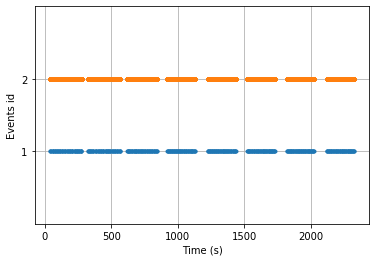

{'1': 1, '2': 2}
1


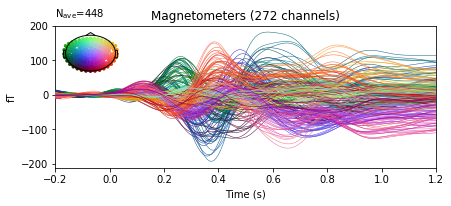

2


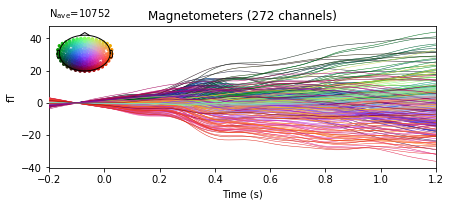

Loading data for 11200 events and 1681 original time points ...
0 bad epochs dropped
(11200, 272, 169) (11200,)
(11200,) (11200, 169)
.
..
...
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
.
..
...
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
.
..
...
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
.
..
...
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
.
..
...
[                

In [ ]:
tmin, tmax = -0.2, 1.2
picks = 'mag'
rawraw = mne.concatenate_raws([mne.io.read_raw_fif(fifs.loc['S02_R{:02d}'.format(j)]['icapath']) for j in range(4, 12)])
results = dict()
for freqs in iter_freqs:
    print('-' * 80)
    print(freqs)
    name_freq, l_freq, h_freq = freqs
    
    # Load raw
    raw = rawraw.copy()
    raw.load_data()
    
    # Filter
    raw.filter(l_freq=l_freq, h_freq=h_freq)

    # Get epochs
    # Raw epochs
    epochs = mne.Epochs(raw, mne.find_events(raw, stim_channel='UPPT001'), picks=picks, tmin=tmin, tmax=tmax, decim=10)
    # Clear events
    epochs = epochs[['1', '2']]
    
    event_id = epochs.event_id
    # Get and plot events
    events = epochs.events
    mne.viz.plot_events(events, sfreq=raw.info['sfreq'])
    print(event_id)
    # Plot epochs
    for event in event_id:
        print(event)
        epochs[event].average().plot(spatial_colors=True)

    # MVPA raw
    # Get X, y
    X = epochs.get_data()
    y = events[:, -1]
    print(X.shape, y.shape)
    # Prepare predicts
    y_predict = np.zeros(X.shape[0])
    y_time_predict = np.zeros((X.shape[0], X.shape[2]))
    print(y_predict.shape, y_time_predict.shape)
    # Cross validation
    for train, test in skf.split(X, y):
        # Split train and test
        print('.')
        X_train, y_train = X[train], y[train]
        X_test, y_test = X[test], y[test]
        # All time train and test
        print('..')
        raw_decoder.fit(X_train, y_train)
        y_predict[test] = raw_decoder.predict(X_test)
        # Window time train and test
        print('...')
        time_decoder.fit(X_train, y_train)
        y_time_predict[test, :] = time_decoder.predict(X_test)
    # Reports
    # All time report
    print(sklearn.metrics.classification_report(y_pred=y_predict, y_true=y))
    print(sklearn.metrics.precision_score(y_pred=y_predict, y_true=y, average='weighted'))
    # Window time report
    scores = np.zeros(y_time_predict.shape[1])
    for j, y_pred in enumerate(y_time_predict.transpose()):
        scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y, average='weighted')
    plt.plot(scores)

    # MVPA xdawn
    epochs.baseline = None
    # Get X, y
    X = epochs.get_data()
    y = events[:, -1]
    print(X.shape, y.shape)
    # Prepare predicts
    xdawn_y_predict = np.zeros(X.shape[0])
    xdawn_y_time_predict = np.zeros((X.shape[0], X.shape[2]))
    print(xdawn_y_predict.shape, xdawn_y_time_predict.shape)
    # Cross validation
    for train, test in skf.split(X, y):
        # Split train and test
        # Transoform using xdawn
        X_train, y_train = xdawn.fit_transform(epochs[train]), y[train]
        X_test, y_test = xdawn.transform(epochs[test]), y[test]
        # All time train and test
        raw_decoder.fit(X_train, y_train)
        xdawn_y_predict[test] = raw_decoder.predict(X_test)
        # Window time train and test
        time_decoder.fit(X_train, y_train)
        xdawn_y_time_predict[test, :] = time_decoder.predict(X_test)
    # Reports
    # All time report
    print(sklearn.metrics.classification_report(y_pred=xdawn_y_predict, y_true=y))
    print(sklearn.metrics.precision_score(y_pred=xdawn_y_predict, y_true=y, average='weighted'))
    # Window time report
    xdawn_scores = np.zeros(xdawn_y_time_predict.shape[1])
    for j, y_pred in enumerate(xdawn_y_time_predict.transpose()):
        xdawn_scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y, average='weighted')
    plt.plot(xdawn_scores)
    
    # Save results
    results[name_freq] = dict(
        y_true = y,
        y_pred = y_predict,
        y_time_pred = y_time_predict,
        xdawn_y_pred = xdawn_y_predict,
        xdawn_y_time_pred = xdawn_y_time_predict,
    )

In [ ]:
import pandas as pd
df = pd.DataFrame(results)
df = df.T
df.to_json('MVPAresults.json')
df